In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import textwrap

# Data

In [2]:
df = pd.read_csv('../notebooks/final_data.csv')
df.head()

,encounter_id,patient_nbr,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,medical_specialty,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),NaN,Not Mapped,Physician Referral,1,Pediatrics-Endocrinology,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),Emergency,Discharged to home,Emergency Room,3,?,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),Emergency,Discharged to home,Emergency Room,2,?,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),Emergency,Discharged to home,Emergency Room,2,?,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),Emergency,Discharged to home,Emergency Room,1,?,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


# Configuration

In [3]:
# Setting Fonts

xfont = {
    'family': 'serif',
    'color': 'blue',
    'weight': 'bold',
    'size': 12
}

yfont = {
    'family': 'serif',
    'color': 'blue',
    'weight': 'bold',
    'size': 12
}
title_font = {
    'family': 'serif',
    'color': 'k',
    'weight': 'bold',
    'size': 18,
    'style':'italic'
}

# Plots

# 1. Composition of male and female patients

In [4]:
# Getting the value counts from the overall data

comp = df['gender'].value_counts()

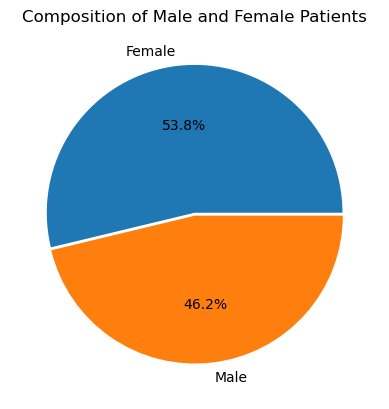

In [5]:
fig = plt.figure()

ax = fig.add_subplot()

# Plotting line
ax.pie(comp, labels=comp.index, autopct= '%1.1f%%', explode = [0.01,0.01])

#setting title
ax.set_title('Composition of Male and Female Patients')

plt.show()

# 2. The total number of patients in each age categories (total of 10 categories). 

# The total patients visited count (it ranges from a patient visited maximum of 40 times and minimum of 1 time (total of 71518 patients)

In [6]:
total = df['patient_nbr'].value_counts()
total

88785891     40
43140906     28
23199021     23
1660293      23
88227540     23
             ..
11005362      1
98252496      1
1019673       1
13396320      1
175429310     1
Name: patient_nbr, Length: 71515, dtype: int64

# It is number of patients and its patient_id visited only one time (total of 54745)

# No duplicate values

In [7]:
# These patients visited one time

total[total == 1]

23082642     1
57866805     1
52111557     1
42374610     1
56766564     1
            ..
11005362     1
98252496     1
1019673      1
13396320     1
175429310    1
Name: patient_nbr, Length: 54742, dtype: int64

# It is the number of patients and its patient_id visited more than on time (total of 16773)

In [8]:
# These patients visited more than one time

repeated = total[total != 1]
repeated

88785891     40
43140906     28
23199021     23
1660293      23
88227540     23
             ..
139028153     2
4169106       2
23474871      2
59391513      2
44002701      2
Name: patient_nbr, Length: 16773, dtype: int64

# Therefore 54745 + 16773 = 71518 patients

In [9]:
age_cat = df['age'].value_counts()
age_cat

[70-80)     26066
[60-70)     22482
[50-60)     17256
[80-90)     17197
[40-50)      9685
[30-40)      3775
[90-100)     2793
[20-30)      1657
[10-20)       691
[0-10)        161
Name: age, dtype: int64

In [10]:
age_male = df.loc[df['gender'] == 'Male']['age'].value_counts()
age_male

[70-80)     12081
[60-70)     11421
[50-60)      8684
[80-90)      6682
[40-50)      4874
[30-40)      1613
[90-100)      790
[20-30)       543
[10-20)       289
[0-10)         78
Name: age, dtype: int64

In [11]:
age_female = df.loc[df['gender'] == 'Female']['age'].value_counts()
age_female

[70-80)     13985
[60-70)     11061
[80-90)     10515
[50-60)      8572
[40-50)      4811
[30-40)      2162
[90-100)     2003
[20-30)      1114
[10-20)       402
[0-10)         83
Name: age, dtype: int64

In [12]:
age_cat.sum()

101763

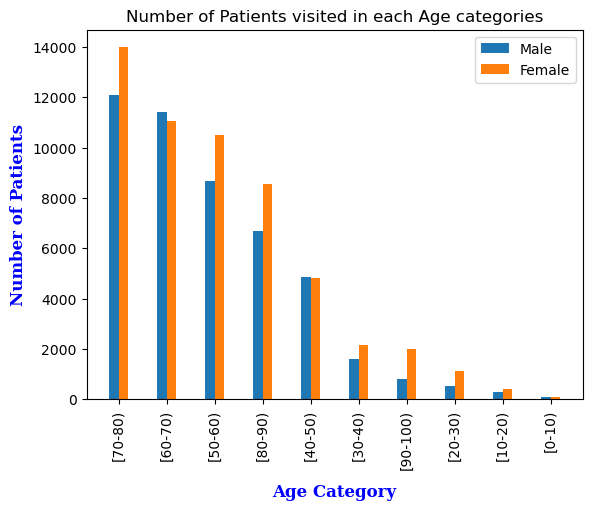

In [13]:
fig = plt.figure()
ax = fig.add_subplot()

x = np.arange(1, len(age_male)+1)

# Plotting line
ax.bar(x-0.1, age_male, width=0.2, label = 'Male')
ax.bar(x+0.1, age_female, width=0.2, label = 'Female')

# Setting title
ax.set_title('Number of Patients visited in each Age categories')

# setting labels
ax.set_xlabel('Age Category', fontdict=xfont, labelpad=10)
ax.set_ylabel('Number of Patients', fontdict=yfont)

# setting ticks
ax.set_xticks(range(1, len(age_cat)+1))
ax.set_xticklabels(age_cat.index, rotation = 90)



# setting legend
ax.legend()

plt.show()

# Another method

In [14]:
age_cat = df['age'].value_counts().sort_index()
age_cat

[0-10)        161
[10-20)       691
[20-30)      1657
[30-40)      3775
[40-50)      9685
[50-60)     17256
[60-70)     22482
[70-80)     26066
[80-90)     17197
[90-100)     2793
Name: age, dtype: int64

In [15]:
age_index = np.array(age_cat.index)
age_index

array(['[0-10)', '[10-20)', '[20-30)', '[30-40)', '[40-50)', '[50-60)',
       '[60-70)', '[70-80)', '[80-90)', '[90-100)'], dtype=object)

In [16]:
age_male = df.loc[(df['gender'] == 'Male') &
                      (df['age'].isin(age_index))]['age'].value_counts().sort_index()
age_male

[0-10)         78
[10-20)       289
[20-30)       543
[30-40)      1613
[40-50)      4874
[50-60)      8684
[60-70)     11421
[70-80)     12081
[80-90)      6682
[90-100)      790
Name: age, dtype: int64

In [17]:
age_female = df.loc[(df['gender'] == 'Female') &
                      (df['age'].isin(age_index))]['age'].value_counts().sort_index()
age_female

[0-10)         83
[10-20)       402
[20-30)      1114
[30-40)      2162
[40-50)      4811
[50-60)      8572
[60-70)     11061
[70-80)     13985
[80-90)     10515
[90-100)     2003
Name: age, dtype: int64

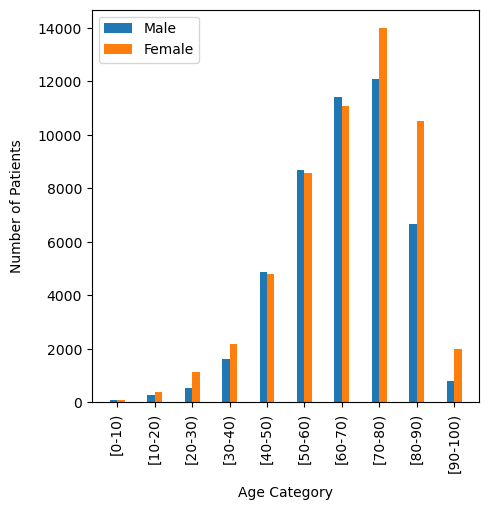

In [18]:
fig = plt.figure(figsize=(5, 5.1))
ax = fig.add_subplot()

x = np.arange(1, len(age_cat) + 1)

# Plotting line
ax.bar(x - 0.1, age_male, width=0.2, label='Male')
ax.bar(x + 0.1, age_female, width=0.2, label='Female')

# Setting title
# ax.set_title('Number of Visited Patients in each Age category')

# setting labels
ax.set_xlabel('Age Category', labelpad=10)
ax.set_ylabel('Number of Patients', labelpad=10)

# setting ticks
ax.set_xticks(range(1, len(age_cat) + 1))
ax.set_xticklabels(age_index, rotation=90)

# setting legend
ax.legend()

plt.show()

# 3. The maximum number of patients visited among the 8 types of admission.

In [19]:
admission = df['admission_type_id'].value_counts()
admission

Emergency        53988
Elective         18868
Urgent           18480
Not Available     4785
Not Mapped         320
Trauma Center       21
Newborn             10
Name: admission_type_id, dtype: int64

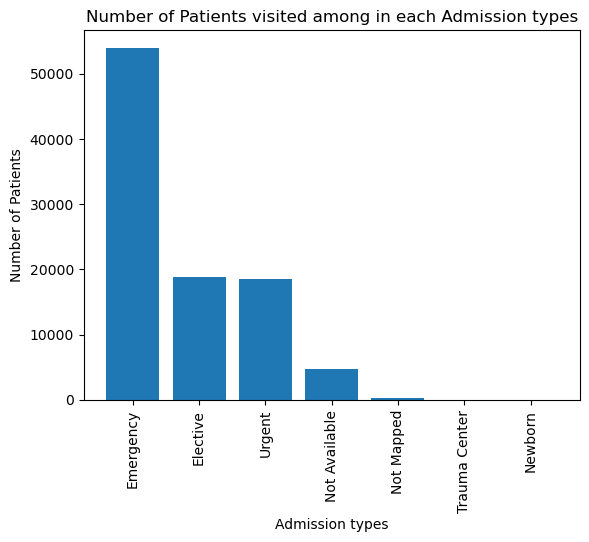

In [20]:
fig = plt.figure()
ax = fig.add_subplot()

# Plotting line
ax.bar(admission.index, admission)

# Setting title
ax.set_title('Number of Patients visited among in each Admission types')

# setting labels
ax.set_xlabel('Admission types')
ax.set_ylabel('Number of Patients')

# setting ticks
ax.set_xticks(range(len(admission)))
ax.set_xticklabels(admission.index, rotation = 90)

plt.show()

# Another method - Pie chart and also applied others category for less values

In [21]:
# Getting first 3 values

ft = admission[:3]
ft

Emergency    53988
Elective     18868
Urgent       18480
Name: admission_type_id, dtype: int64

In [22]:
others = pd.Series(admission[3:].sum())
others

0    5136
dtype: int64

In [23]:
others = others.rename(index={0:'Others (Not Available, Not Mapped, Trauma Center, Newborn)'})
others

Others (Not Available, Not Mapped, Trauma Center, Newborn)    5136
dtype: int64

In [24]:
admission_new = pd.concat([ft, others])
admission_new.sort_values(ascending=False)

Emergency                                                     53988
Elective                                                      18868
Urgent                                                        18480
Others (Not Available, Not Mapped, Trauma Center, Newborn)     5136
dtype: int64

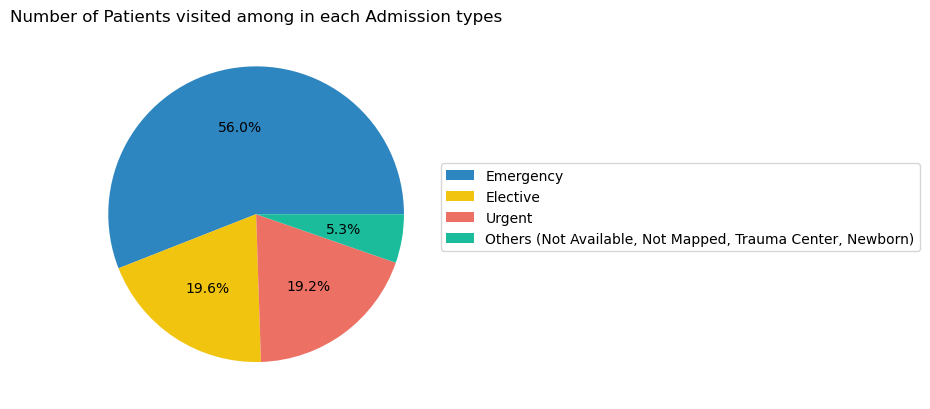

In [25]:
fig = plt.figure()
ax = fig.add_subplot()

# Plotting line
ax.pie(admission_new, autopct='%1.1f%%', colors=['#2E86C1', '#F1C40F', '#EC7063', '#1ABC9C', '#8E44AD'])

# Setting title
ax.set_title('Number of Patients visited among in each Admission types')

# setting legend
ax.legend(admission_new.index, loc=(1,0.4))

plt.show()

# Another method - seaborn (countplot)

In [26]:
admission

Emergency        53988
Elective         18868
Urgent           18480
Not Available     4785
Not Mapped         320
Trauma Center       21
Newborn             10
Name: admission_type_id, dtype: int64

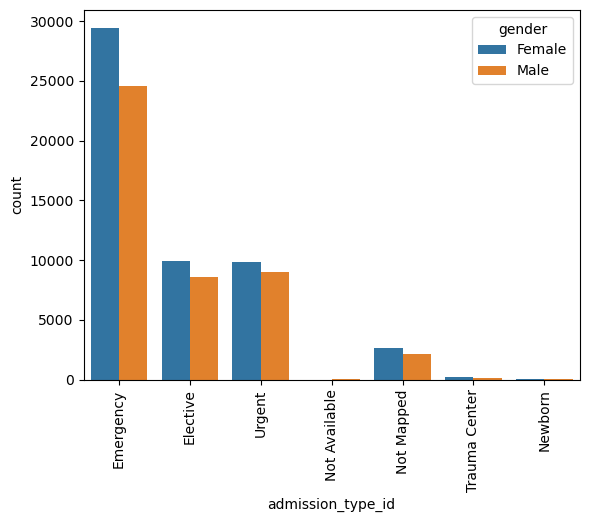

In [27]:
fig = plt.figure()
ax = fig.add_subplot()

sns.countplot(data=df, x='admission_type_id', hue='gender')

ax.set_xticks(range(len(admission)))
ax.set_xticklabels(admission.index, rotation=90)

plt.show()

# Another method - Paired Bar plot

In [28]:
male_ad_type = df[df['gender'] == 'Male']['admission_type_id'].value_counts()
male_ad_type

Emergency        24540
Elective          9028
Urgent            8586
Not Available     2176
Not Mapped         144
Trauma Center       12
Newborn              7
Name: admission_type_id, dtype: int64

In [29]:
female_ad_type = df[df['gender'] == 'Female']['admission_type_id'].value_counts()
female_ad_type

Emergency        29448
Urgent            9894
Elective          9840
Not Available     2609
Not Mapped         176
Trauma Center        9
Newborn              3
Name: admission_type_id, dtype: int64

In [30]:
# fig = plt.figure()
# ax = fig.add_subplot()

# # Plotting line

# x = range(1, len(male_ad_type.index)+1)

# ax.bar(x-0.1, male_ad_type, width=0.2, label='Male')
# ax.bar(x+0.1, female_ad_type, width=0.2, label='Female')

# # Setting title
# ax.set_title('Number of Patients visited among in each Admission types')

# # setting labels
# ax.set_xlabel('Admission types')
# ax.set_ylabel('Number of Patients')

# # setting ticks
# ax.set_xticks(range(1, len(male_ad_type.index)+1))
# ax.set_xticklabels(male_ad_type.index, rotation = 90)

# # setting legend
# ax.legend()

# plt.show()

# 4. The top medical specialty who are attending the patients

In [31]:
df['medical_specialty'].value_counts()

?                                49947
InternalMedicine                 14635
Emergency/Trauma                  7565
Family/GeneralPractice            7440
Cardiology                        5351
                                 ...  
SportsMedicine                       1
Speech                               1
Perinatology                         1
Neurophysiology                      1
Pediatrics-InfectiousDiseases        1
Name: medical_specialty, Length: 73, dtype: int64

In [32]:
specialty = df.loc[df['medical_specialty'] != '?']['medical_specialty']
specialty

0         Pediatrics-Endocrinology
9                 InternalMedicine
12          Family/GeneralPractice
13          Family/GeneralPractice
17                      Cardiology
                    ...           
101732            Emergency/Trauma
101740            Emergency/Trauma
101744            InternalMedicine
101746                 Orthopedics
101761             Surgery-General
Name: medical_specialty, Length: 51816, dtype: object

In [33]:
specialty_sort = specialty.value_counts()[:5]
specialty_sort

InternalMedicine          14635
Emergency/Trauma           7565
Family/GeneralPractice     7440
Cardiology                 5351
Surgery-General            3099
Name: medical_specialty, dtype: int64

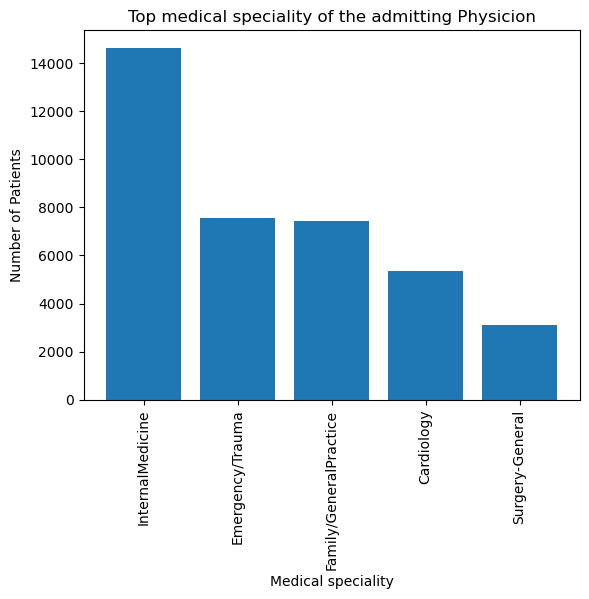

In [34]:
fig = plt.figure()
ax = fig.add_subplot()

# Plotting line
ax.bar(specialty_sort.index, specialty_sort)

# setting title
ax.set_title('Top medical speciality of the admitting Physicion')

# setting labels
ax.set_xlabel('Medical speciality')
ax.set_ylabel('Number of Patients')

# setting ticks
ax.set_xticks(range(len(specialty_sort.index)))
ax.set_xticklabels(specialty_sort.index, rotation=90)

plt.show()

# 5. The most frequent (top 5) discharge types for the diabetic patients over all the hospitals

In [35]:
df.head()

,encounter_id,patient_nbr,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,medical_specialty,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),NaN,Not Mapped,Physician Referral,1,Pediatrics-Endocrinology,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),Emergency,Discharged to home,Emergency Room,3,?,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),Emergency,Discharged to home,Emergency Room,2,?,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),Emergency,Discharged to home,Emergency Room,2,?,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),Emergency,Discharged to home,Emergency Room,1,?,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


In [36]:
discharge = df['discharge_disposition_id'].value_counts()[:5]
discharge

Discharged to home                                                                   60232
Discharged/transferred to SNF                                                        13954
Discharged/transferred to home with home health service                              12902
Discharged/transferred to another short term hospital                                 2128
Discharged/transferred to another rehab fac including rehab units of a hospital .     1992
Name: discharge_disposition_id, dtype: int64

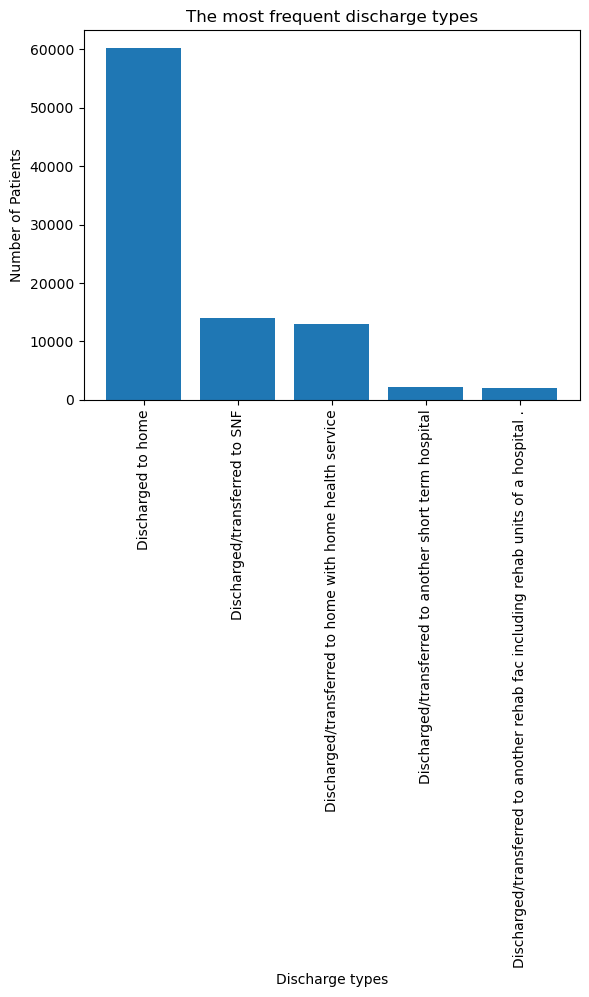

In [37]:
fig = plt.figure()
ax = fig.add_subplot()

# plotting line
ax.bar(discharge.index, discharge)


# setting title
ax.set_title('The most frequent discharge types')

# setting labels
ax.set_xlabel('Discharge types')
ax.set_ylabel('Number of Patients')

# setting ticks
ax.set_xticks(range(len(discharge)))
ax.set_xticklabels(discharge.index, rotation=90)


plt.show()

In [38]:
a = [label.split(' ') for label in discharge.index]
a

[['Discharged', 'to', 'home'],
 ['Discharged/transferred', 'to', 'SNF'],
 ['Discharged/transferred', 'to', 'home', 'with', 'home', 'health', 'service'],
 ['Discharged/transferred', 'to', 'another', 'short', 'term', 'hospital'],
 ['Discharged/transferred',
  'to',
  'another',
  'rehab',
  'fac',
  'including',
  'rehab',
  'units',
  'of',
  'a',
  'hospital',
  '.']]

In [39]:
disch = []
for val in a:
    for v in val:
        disch.append(v)

In [40]:
disch

['Discharged',
 'to',
 'home',
 'Discharged/transferred',
 'to',
 'SNF',
 'Discharged/transferred',
 'to',
 'home',
 'with',
 'home',
 'health',
 'service',
 'Discharged/transferred',
 'to',
 'another',
 'short',
 'term',
 'hospital',
 'Discharged/transferred',
 'to',
 'another',
 'rehab',
 'fac',
 'including',
 'rehab',
 'units',
 'of',
 'a',
 'hospital',
 '.']

In [41]:
d = ['to home', 'to SNF', 'to home with health service', 'to short term hospital', 'to rehab fac']
d

['to home',
 'to SNF',
 'to home with health service',
 'to short term hospital',
 'to rehab fac']

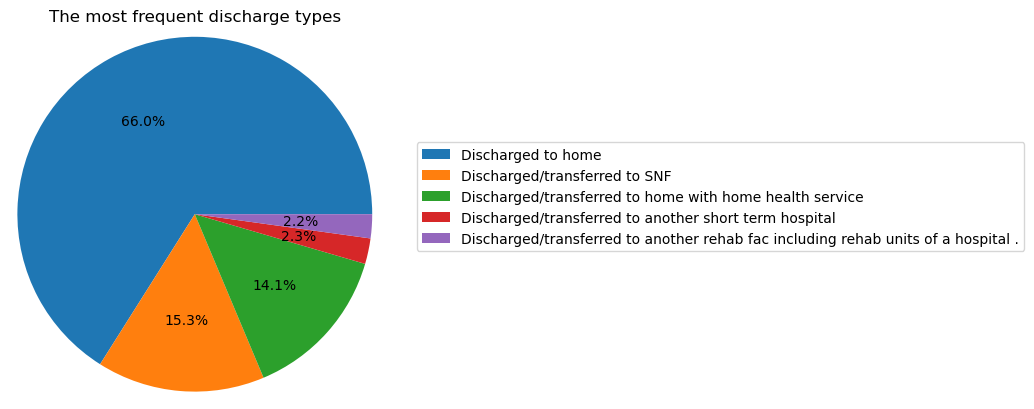

In [42]:
fig = plt.figure()
ax = fig.add_subplot()

# plotting line
ax.pie(discharge, autopct='%1.1f%%', radius=1.2)

# setting title
ax.set_title('The most frequent discharge types')

ax.legend(discharge.index, loc=(1.1,0.4))


plt.show()

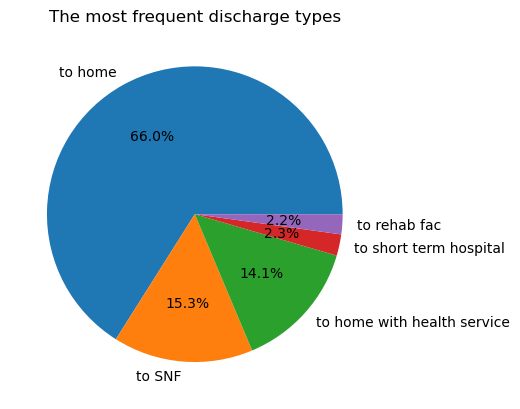

In [43]:
fig = plt.figure()
ax = fig.add_subplot()

# plotting line
ax.pie(discharge, labels = d, autopct='%1.1f%%')

# setting title
ax.set_title('The most frequent discharge types')

plt.show()

# 6. The most frequent (top 5) admission sources for the diabetic patients over all the hospitals

In [44]:
df.head()

,encounter_id,patient_nbr,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,medical_specialty,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),NaN,Not Mapped,Physician Referral,1,Pediatrics-Endocrinology,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),Emergency,Discharged to home,Emergency Room,3,?,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),Emergency,Discharged to home,Emergency Room,2,?,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),Emergency,Discharged to home,Emergency Room,2,?,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),Emergency,Discharged to home,Emergency Room,1,?,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


In [45]:
admission_source = df['admission_source_id'].value_counts()[:5]
admission_source

Emergency Room                                57492
Physician Referral                            29564
Transfer from a hospital                       3187
Transfer from another health care facility     2264
Clinic Referral                                1104
Name: admission_source_id, dtype: int64

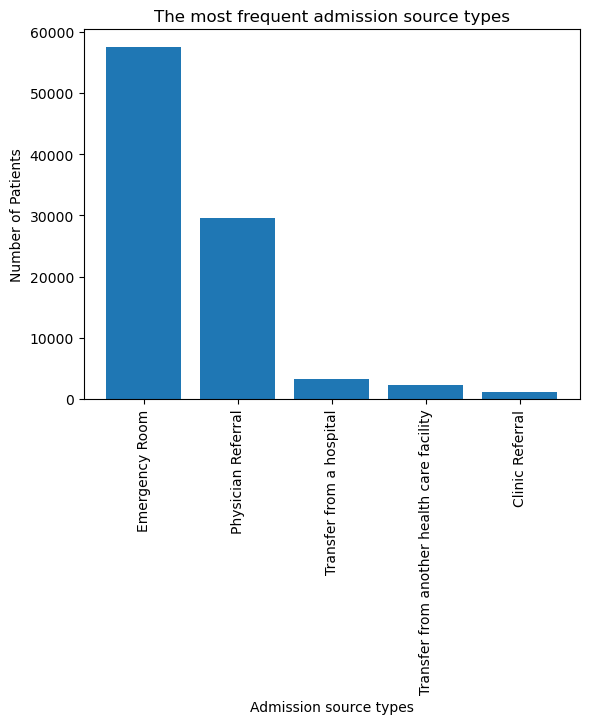

In [46]:
fig = plt.figure()
ax = fig.add_subplot()

# plotting line
ax.bar(admission_source.index, admission_source)

# setting title
ax.set_title('The most frequent admission source types')

# setting labels
ax.set_xlabel('Admission source types')
ax.set_ylabel('Number of Patients')

# setting ticks
ax.set_xticks(range(len(admission_source)))
ax.set_xticklabels(admission_source.index, rotation=90)

plt.show()

In [47]:
# Another method

In [48]:
addm = df['admission_source_id'].value_counts()[:5].sort_index()
addm

Clinic Referral                                1104
Emergency Room                                57492
Physician Referral                            29564
Transfer from a hospital                       3187
Transfer from another health care facility     2264
Name: admission_source_id, dtype: int64

In [49]:
len(addm)

5

In [50]:
addm_index = np.array(addm.index)
addm_index

array(['Clinic Referral', 'Emergency Room', 'Physician Referral',
       'Transfer from a hospital',
       'Transfer from another health care facility'], dtype=object)

In [51]:
male_addm = df.loc[(df['gender'] == 'Male') & 
                   (df['admission_source_id'].isin(addm_index))]['admission_source_id'].value_counts().sort_index()
male_addm

Clinic Referral                                 578
Emergency Room                                26310
Physician Referral                            13954
Transfer from a hospital                       1493
Transfer from another health care facility      950
Name: admission_source_id, dtype: int64

In [52]:
female_addm = df.loc[(df['gender'] == 'Female') & 
                     (df['admission_source_id'].isin(addm_index))]['admission_source_id'].value_counts().sort_index()
female_addm

Clinic Referral                                 526
Emergency Room                                31182
Physician Referral                            15610
Transfer from a hospital                       1694
Transfer from another health care facility     1314
Name: admission_source_id, dtype: int64

In [53]:
np.arange(1, len(addm)+1)

array([1, 2, 3, 4, 5])

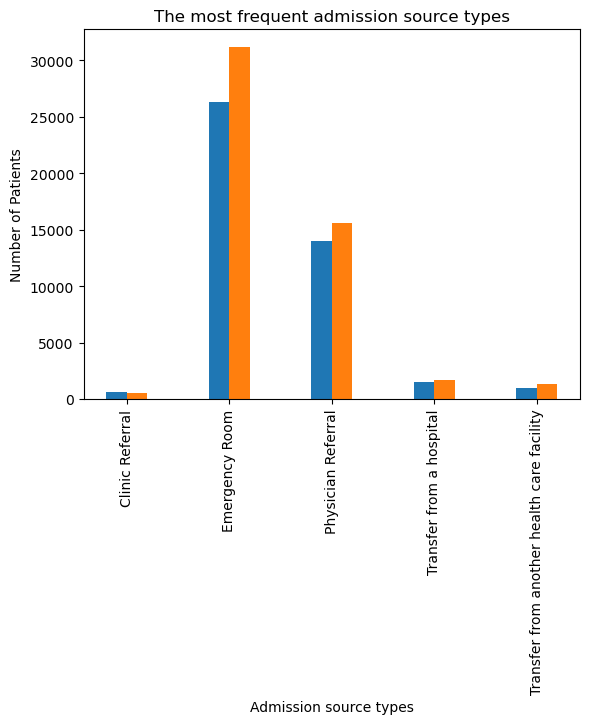

In [54]:
fig = plt.figure()
ax = fig.add_subplot()

x = np.arange(1, len(addm)+1)

# plotting line
ax.bar(x-0.1, male_addm, width=0.2, label='Male')
ax.bar(x+0.1, female_addm, width=0.2, label='Female')


# setting title
ax.set_title('The most frequent admission source types')

# setting ticks
ax.set_xticks(range(1, len(addm)+1))
ax.set_xticklabels(addm.index, rotation=90)

# setting labels
ax.set_xlabel('Admission source types')
ax.set_ylabel('Number of Patients')



plt.show()

# Another method

In [55]:
male_ad = df.loc[df['gender'] == 'Male']['admission_source_id']
male_ad

3          Emergency Room
4          Emergency Room
5         Clinic Referral
6         Clinic Referral
7          Emergency Room
               ...       
101750     Emergency Room
101756     Emergency Room
101758     Emergency Room
101760     Emergency Room
101762     Emergency Room
Name: admission_source_id, Length: 47055, dtype: object

In [56]:
top_male_ad = male_ad.value_counts()[:5]
top_male_ad

Emergency Room                                26310
Physician Referral                            13954
Transfer from a hospital                       1493
Transfer from another health care facility      950
Clinic Referral                                 578
Name: admission_source_id, dtype: int64

In [57]:
female_ad = df.loc[df['gender'] == 'Female']['admission_source_id']
female_ad

0                                     Physician Referral
1                                         Emergency Room
2                                         Emergency Room
8                               Transfer from a hospital
9                               Transfer from a hospital
                               ...                      
101754                                    Emergency Room
101755                                    Emergency Room
101757                                    Emergency Room
101759    Transfer from a Skilled Nursing Facility (SNF)
101761                                    Emergency Room
Name: admission_source_id, Length: 54708, dtype: object

In [58]:
top_female_ad = female_ad.value_counts()[:5]
top_female_ad

Emergency Room                                    31182
Physician Referral                                15610
Transfer from a hospital                           1694
Transfer from another health care facility         1314
Transfer from a Skilled Nursing Facility (SNF)      575
Name: admission_source_id, dtype: int64

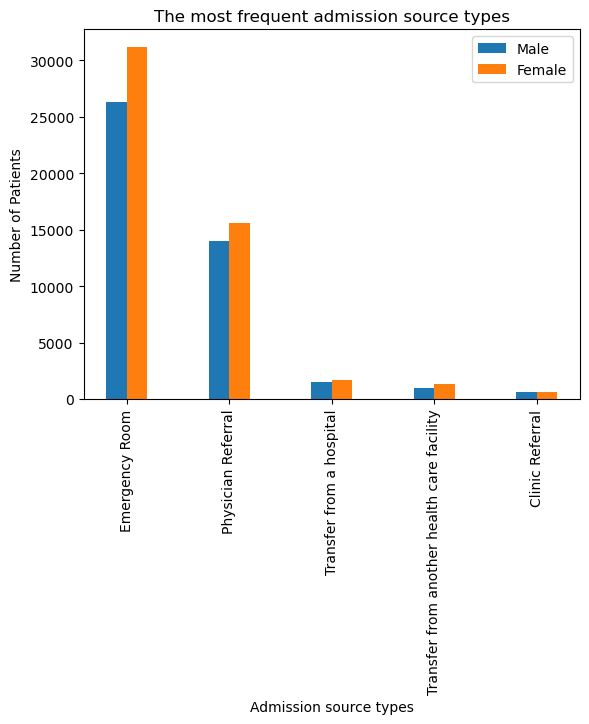

In [59]:
fig = plt.figure()
ax = fig.add_subplot()

x = np.arange(1, len(top_male_ad.index)+1)

# plotting line
ax.bar(x-0.1, top_male_ad, width=0.2, label='Male')
ax.bar(x+0.1, top_female_ad, width=0.2, label='Female')

# setting title
ax.set_title('The most frequent admission source types')

# setting ticks
ax.set_xticks(range(1, len(top_male_ad.index)+1))
ax.set_xticklabels(top_male_ad.index, rotation=90)

# setting labels
ax.set_xlabel('Admission source types')
ax.set_ylabel('Number of Patients')

# setting legend
ax.legend()


plt.show()

# Another method - using seaborn (barplot)

In [60]:
admission_source

Emergency Room                                57492
Physician Referral                            29564
Transfer from a hospital                       3187
Transfer from another health care facility     2264
Clinic Referral                                1104
Name: admission_source_id, dtype: int64

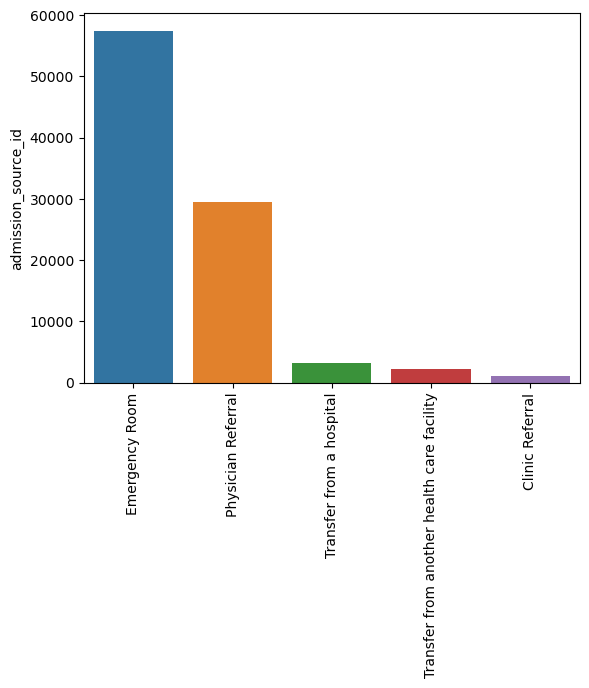

In [61]:
fig = plt.figure()
ax = fig.add_subplot()

sns.barplot(x=admission_source.index, y=admission_source)

ax.set_xticks(range(len(admission_source)))
ax.set_xticklabels(admission_source.index, rotation=90)

plt.show()

# 7. The max_glu_serum test result conducted among the visited patients

In [62]:
df.head()

,encounter_id,patient_nbr,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,medical_specialty,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),NaN,Not Mapped,Physician Referral,1,Pediatrics-Endocrinology,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),Emergency,Discharged to home,Emergency Room,3,?,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),Emergency,Discharged to home,Emergency Room,2,?,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),Emergency,Discharged to home,Emergency Room,2,?,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),Emergency,Discharged to home,Emergency Room,1,?,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


In [63]:
df['max_glu_serum'].value_counts()

None    96417
Norm     2597
>200     1485
>300     1264
Name: max_glu_serum, dtype: int64

In [64]:
max_glu_serum = df.loc[df['max_glu_serum'] != 'None']['max_glu_serum'].value_counts()
max_glu_serum

Norm    2597
>200    1485
>300    1264
Name: max_glu_serum, dtype: int64

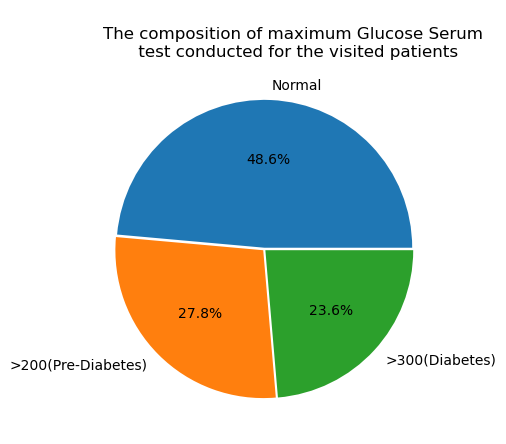

In [65]:
fig = plt.figure()
ax = fig.add_subplot()

# plotting line
ax.pie(max_glu_serum, labels=['Normal', '>200(Pre-Diabetes)', '>300(Diabetes)'], autopct='%1.1f%%', explode=[0.01,0.01,0.01])

# setting title
ax.set_title('''
            The composition of maximum Glucose Serum 
             test conducted for the visited patients''')

plt.show()

# 8. A1C test conducted among the visited patients

In [66]:
df.head()

,encounter_id,patient_nbr,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,medical_specialty,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),NaN,Not Mapped,Physician Referral,1,Pediatrics-Endocrinology,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),Emergency,Discharged to home,Emergency Room,3,?,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),Emergency,Discharged to home,Emergency Room,2,?,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),Emergency,Discharged to home,Emergency Room,2,?,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),Emergency,Discharged to home,Emergency Room,1,?,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


In [67]:
df['A1Cresult'].value_counts()

None    84745
>8       8216
Norm     4990
>7       3812
Name: A1Cresult, dtype: int64

In [68]:
a1c_result = df.loc[df['A1Cresult'] != 'None']['A1Cresult'].value_counts()
a1c_result

>8      8216
Norm    4990
>7      3812
Name: A1Cresult, dtype: int64

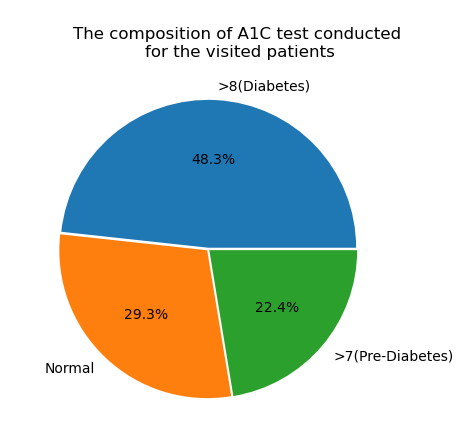

In [69]:
fig = plt.figure()
ax = fig.add_subplot()

# plotting line
ax.pie(a1c_result, labels=['>8(Diabetes)', 'Normal', '>7(Pre-Diabetes)'], autopct='%1.1f%%', explode = [0.01,0.01,0.01])

# setting title
ax.set_title('''
            The composition of A1C test conducted 
            for the visited patients''')

plt.show()

# 9. The Total number of visited patient stayed for 1 to 14 days.

In [70]:
df['time_in_hospital']

0          1
1          3
2          2
3          2
4          1
          ..
101758     3
101759     5
101760     1
101761    10
101762     6
Name: time_in_hospital, Length: 101763, dtype: int64

In [71]:
time = df['time_in_hospital'].value_counts()
time

3     17756
2     17224
1     14206
4     13924
5      9966
6      7539
7      5859
8      4390
9      3002
10     2342
11     1855
12     1448
13     1210
14     1042
Name: time_in_hospital, dtype: int64

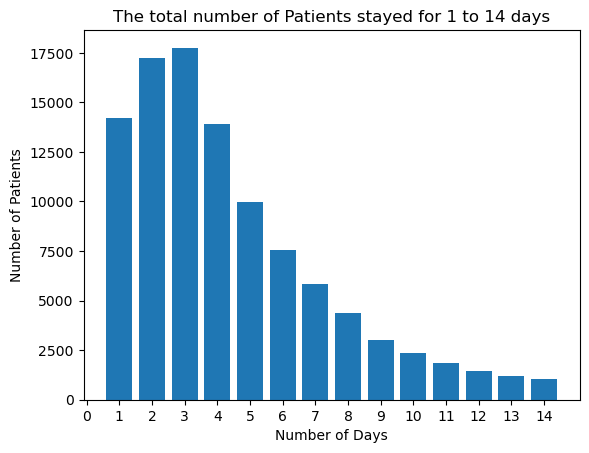

In [72]:
fig = plt.figure()
ax = fig.add_subplot()

# plotting line
ax.bar(time.index, time)

# setting ticks
ax.set_xticks(range(len(time) + 1))

# setting lables
ax.set_xlabel('Number of Days')
ax.set_ylabel('Number of Patients')

# setting title
ax.set_title('The total number of Patients stayed for 1 to 14 days')


plt.show()

# Another method - Stacked Bar plot

In [73]:
time_male = df.loc[df['gender'] == 'Male']['time_in_hospital'].value_counts()
time_male

2     8160
3     8150
1     7289
4     6222
5     4478
6     3265
7     2627
8     1976
9     1339
10    1052
11     820
12     654
13     559
14     464
Name: time_in_hospital, dtype: int64

In [74]:
time_male = time_male.sort_index()
time_male

1     7289
2     8160
3     8150
4     6222
5     4478
6     3265
7     2627
8     1976
9     1339
10    1052
11     820
12     654
13     559
14     464
Name: time_in_hospital, dtype: int64

In [75]:
time_female = df.loc[df['gender'] == 'Female']['time_in_hospital'].value_counts()
time_female

3     9606
2     9064
4     7702
1     6917
5     5488
6     4274
7     3232
8     2414
9     1663
10    1290
11    1035
12     794
13     651
14     578
Name: time_in_hospital, dtype: int64

In [76]:
time_female = time_female.sort_index()
time_female

1     6917
2     9064
3     9606
4     7702
5     5488
6     4274
7     3232
8     2414
9     1663
10    1290
11    1035
12     794
13     651
14     578
Name: time_in_hospital, dtype: int64

In [77]:
bottom_female = np.array(time_male)
bottom_female

array([7289, 8160, 8150, 6222, 4478, 3265, 2627, 1976, 1339, 1052,  820,
        654,  559,  464], dtype=int64)

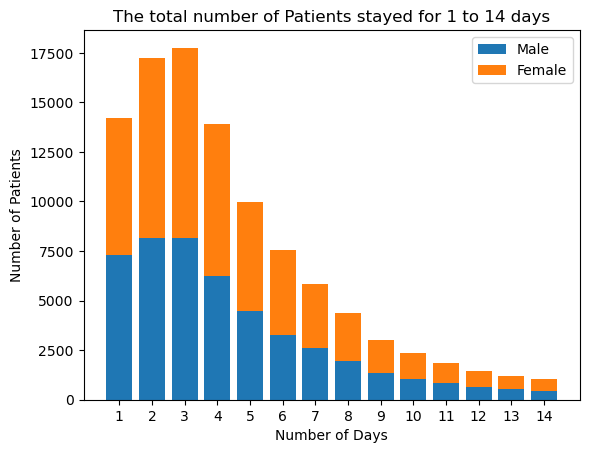

In [78]:
fig = plt.figure()
ax = fig.add_subplot()

# plotting line
ax.bar(time_male.index, time_male, label = 'Male')
ax.bar(time_female.index, time_female, bottom=bottom_female , label = 'Female')

# setting ticks
ax.set_xticks(range(1, len(time) + 1))

# setting lables
ax.set_xlabel('Number of Days')
ax.set_ylabel('Number of Patients')

# setting title
ax.set_title('The total number of Patients stayed for 1 to 14 days')

# setting legend
ax.legend()


plt.show()

# Another method - Paired bar plot

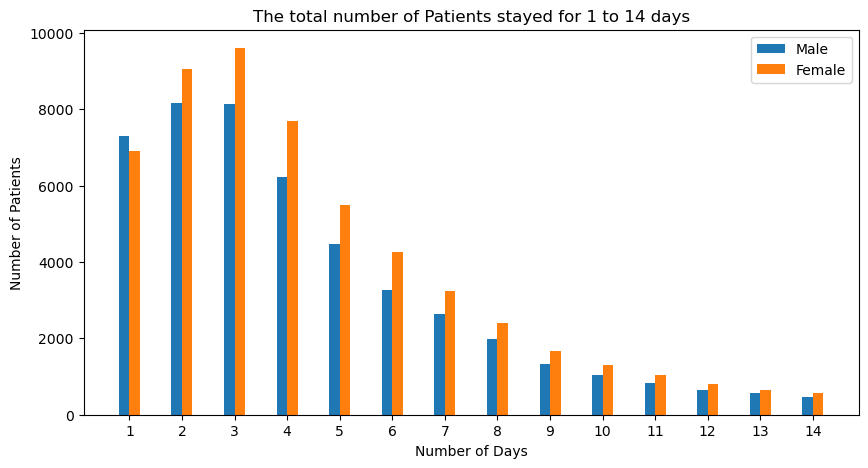

In [79]:
fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot()

x = np.arange(1, len(time_male) + 1)

# plotting line
ax.bar(x-0.1, time_male, width=0.2, label = 'Male')
ax.bar(x+0.1, time_female, width=0.2 , label = 'Female')

# setting ticks
ax.set_xticks(range(1, len(time_male)+1))
ax.set_xticklabels(time_male.index)

# setting lables
ax.set_xlabel('Number of Days')
ax.set_ylabel('Number of Patients')

# setting title
ax.set_title('The total number of Patients stayed for 1 to 14 days')

# setting legend
ax.legend()


plt.show()

In [80]:
np.arange(1, len(time_male) + 1)

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14])

# 10. The readmission rates over all the hospitals for the diabetic patients. 

In [81]:
readmitted = df['readmitted'].value_counts()
readmitted

NO     54861
>30    35545
<30    11357
Name: readmitted, dtype: int64

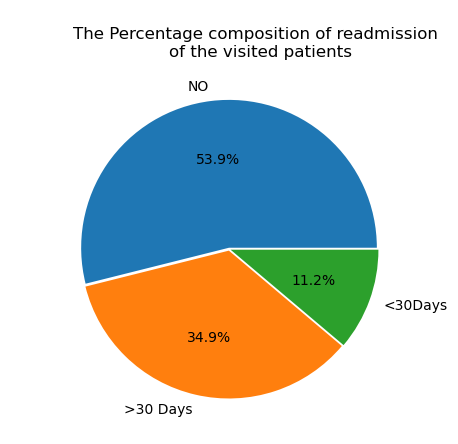

In [82]:
fig = plt.figure()
ax = fig.add_subplot()

# plotting line
ax.pie(readmitted, labels=['NO', '>30 Days', '<30Days'], autopct='%1.1f%%', explode = [0.01,0.01,0.01])

# setting title
ax.set_title('''
            The Percentage composition of readmission  
            of the visited patients''')

plt.show()

# 11. The total number of visited patients given the drug molecule along with the categories (up, down, steady, no).

In [83]:
df.head()

,encounter_id,patient_nbr,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,medical_specialty,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),NaN,Not Mapped,Physician Referral,1,Pediatrics-Endocrinology,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),Emergency,Discharged to home,Emergency Room,3,?,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),Emergency,Discharged to home,Emergency Room,2,?,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),Emergency,Discharged to home,Emergency Room,2,?,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),Emergency,Discharged to home,Emergency Room,1,?,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


In [84]:
df['metformin'].value_counts()

No        81776
Steady    18345
Up         1067
Down        575
Name: metformin, dtype: int64

In [85]:
metformin = df.loc[df['metformin'] != 'No']['metformin'].value_counts()
metformin

Steady    18345
Up         1067
Down        575
Name: metformin, dtype: int64

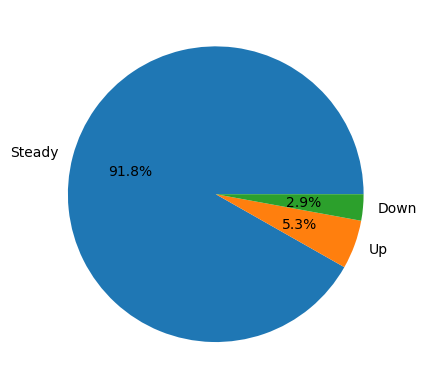

In [86]:
fig = plt.figure()
ax = fig.add_subplot()

# plotting line

ax.pie(metformin, labels=metformin.index, autopct='%1.1f%%')

plt.show()

In [87]:
df['time_in_hospital'].dtype

dtype('int64')

In [88]:
df[df['time_in_hospital'].isin([1,2,3,4])]

,encounter_id,patient_nbr,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,medical_specialty,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),NaN,Not Mapped,Physician Referral,1,Pediatrics-Endocrinology,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),Emergency,Discharged to home,Emergency Room,3,?,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),Emergency,Discharged to home,Emergency Room,2,?,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),Emergency,Discharged to home,Emergency Room,2,?,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),Emergency,Discharged to home,Emergency Room,1,?,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101749,443835512,139605341,Other,Female,[40-50),Elective,Discharged to home,Physician Referral,3,?,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
101753,443842070,140199494,Other,Female,[60-70),Emergency,Discharged to home,Emergency Room,2,?,...,No,Steady,No,No,No,No,No,No,Yes,>30
101756,443842778,86472243,Caucasian,Male,[80-90),Emergency,Discharged to home,Emergency Room,1,?,...,No,Up,No,No,No,No,No,Ch,Yes,NO
101758,443847548,100162476,AfricanAmerican,Male,[70-80),Emergency,Discharged/transferred to SNF,Emergency Room,3,?,...,No,Down,No,No,No,No,No,Ch,Yes,>30


In [89]:
df[(df['gender'] == 'Male') & (df['time_in_hospital'].isin([1,2,3,4])) & 
   (df['max_glu_serum'] == '>300')][['gender', 'max_glu_serum', 'time_in_hospital']]

,gender,max_glu_serum,time_in_hospital
1756,Male,>300,2
2946,Male,>300,3
3143,Male,>300,3
3148,Male,>300,2
3169,Male,>300,1
...,...,...,...
97735,Male,>300,2
98204,Male,>300,3
98264,Male,>300,4
99001,Male,>300,2


In [90]:
df

,encounter_id,patient_nbr,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,medical_specialty,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),NaN,Not Mapped,Physician Referral,1,Pediatrics-Endocrinology,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),Emergency,Discharged to home,Emergency Room,3,?,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),Emergency,Discharged to home,Emergency Room,2,?,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),Emergency,Discharged to home,Emergency Room,2,?,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),Emergency,Discharged to home,Emergency Room,1,?,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101758,443847548,100162476,AfricanAmerican,Male,[70-80),Emergency,Discharged/transferred to SNF,Emergency Room,3,?,...,No,Down,No,No,No,No,No,Ch,Yes,>30
101759,443847782,74694222,AfricanAmerican,Female,[80-90),Emergency,Discharged/transferred to ICF,Transfer from a Skilled Nursing Facility (SNF),5,?,...,No,Steady,No,No,No,No,No,No,Yes,NO
101760,443854148,41088789,Caucasian,Male,[70-80),Emergency,Discharged to home,Emergency Room,1,?,...,No,Down,No,No,No,No,No,Ch,Yes,NO
101761,443857166,31693671,Caucasian,Female,[80-90),Urgent,Discharged/transferred to SNF,Emergency Room,10,Surgery-General,...,No,Up,No,No,No,No,No,Ch,Yes,NO


In [91]:
days_count = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14]
days_count

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14]

In [92]:
df['time_in_hospital'].max()

14

In [93]:
df[(df['time_in_hospital'] >= 5) & (df['time_in_hospital'] <= 14)]

,encounter_id,patient_nbr,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,medical_specialty,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
7,63768,114882984,Caucasian,Male,[70-80),Emergency,Discharged to home,Emergency Room,5,?,...,No,No,No,No,No,No,No,No,Yes,>30
8,12522,48330783,Caucasian,Female,[80-90),Urgent,Discharged to home,Transfer from a hospital,13,?,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
9,15738,63555939,Caucasian,Female,[90-100),Elective,Discharged/transferred to SNF,Transfer from a hospital,12,InternalMedicine,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
10,28236,89869032,AfricanAmerican,Female,[40-50),Emergency,Discharged to home,Emergency Room,9,?,...,No,Steady,No,No,No,No,No,No,Yes,>30
11,36900,77391171,AfricanAmerican,Male,[60-70),Urgent,Discharged to home,Transfer from a hospital,7,?,...,No,Steady,No,No,No,No,No,Ch,Yes,<30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101755,443842340,120975314,Caucasian,Female,[80-90),Emergency,Discharged to home,Emergency Room,5,?,...,No,Up,No,No,No,No,No,Ch,Yes,NO
101757,443847176,50375628,AfricanAmerican,Female,[60-70),Emergency,Discharged to home,Emergency Room,6,?,...,No,Down,No,No,No,No,No,Ch,Yes,>30
101759,443847782,74694222,AfricanAmerican,Female,[80-90),Emergency,Discharged/transferred to ICF,Transfer from a Skilled Nursing Facility (SNF),5,?,...,No,Steady,No,No,No,No,No,No,Yes,NO
101761,443857166,31693671,Caucasian,Female,[80-90),Urgent,Discharged/transferred to SNF,Emergency Room,10,Surgery-General,...,No,Up,No,No,No,No,No,Ch,Yes,NO


In [ ]:
# age_cat = st.multiselect(label='Select Age Category', options=ages, default='All ages')

In [103]:
age_cat = input('Enter the age:')

Enter the age:[0-10)


In [104]:
ages = ['All ages', '[0-10)', '[10-20)', '[20-30)', '[30-40)', '[40-50)', '[50-60)', '[60-70)',
            '[70-80)', '[80-90)', '[90-100)']

ages

['All ages',
 '[0-10)',
 '[10-20)',
 '[20-30)',
 '[30-40)',
 '[40-50)',
 '[50-60)',
 '[60-70)',
 '[70-80)',
 '[80-90)',
 '[90-100)']

In [112]:
if age_cat == 'All ages':
    
    filter_age = df.loc[df['age'].isin(ages[1:])]

else:
    
    filter_age = df.loc[df['age'].isin([age_cat])]

In [113]:
filter_age

,encounter_id,patient_nbr,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,medical_specialty,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),NaN,Not Mapped,Physician Referral,1,Pediatrics-Endocrinology,...,No,No,No,No,No,No,No,No,No,NO
216,2735964,2359485,Caucasian,Female,[0-10),NaN,Not Mapped,Emergency Room,3,Pediatrics-Endocrinology,...,No,Steady,No,No,No,No,No,No,Yes,NO
270,2968386,8568180,Caucasian,Female,[0-10),NaN,Not Mapped,Emergency Room,2,Pediatrics-Endocrinology,...,No,Steady,No,No,No,No,No,No,Yes,NO
294,3108096,5832918,Caucasian,Female,[0-10),NaN,Not Mapped,Emergency Room,1,Pediatrics-CriticalCare,...,No,Steady,No,No,No,No,No,No,Yes,>30
474,4140282,7443135,Caucasian,Female,[0-10),NaN,Not Mapped,Emergency Room,2,Pediatrics,...,No,Steady,No,No,No,No,No,No,Yes,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89535,289449318,42247008,Caucasian,Male,[0-10),Elective,Discharged to home,Physician Referral,2,?,...,No,Up,No,No,No,No,No,Ch,Yes,NO
89633,289969158,44988678,Caucasian,Male,[0-10),Emergency,Discharged to home,Emergency Room,2,?,...,No,No,No,No,No,No,No,No,No,NO
93800,340724906,42347718,Caucasian,Male,[0-10),Elective,Discharged to home,Physician Referral,1,Pediatrics,...,No,No,No,No,No,No,No,No,No,NO
98897,406743404,110172294,Caucasian,Female,[0-10),Emergency,Discharged to home,Emergency Room,1,?,...,No,No,No,No,No,No,No,No,No,NO


In [117]:
dfn = df.loc[df['gender'] == 'Male']
dfn

,encounter_id,patient_nbr,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,medical_specialty,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
3,500364,82442376,Caucasian,Male,[30-40),Emergency,Discharged to home,Emergency Room,2,?,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),Emergency,Discharged to home,Emergency Room,1,?,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
5,35754,82637451,Caucasian,Male,[50-60),Urgent,Discharged to home,Clinic Referral,3,?,...,No,Steady,No,No,No,No,No,No,Yes,>30
6,55842,84259809,Caucasian,Male,[60-70),Elective,Discharged to home,Clinic Referral,4,?,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
7,63768,114882984,Caucasian,Male,[70-80),Emergency,Discharged to home,Emergency Room,5,?,...,No,No,No,No,No,No,No,No,Yes,>30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101750,443841992,184875899,Other,Male,[40-50),Emergency,Discharged to home,Emergency Room,13,?,...,No,Down,No,No,No,No,No,Ch,Yes,NO
101756,443842778,86472243,Caucasian,Male,[80-90),Emergency,Discharged to home,Emergency Room,1,?,...,No,Up,No,No,No,No,No,Ch,Yes,NO
101758,443847548,100162476,AfricanAmerican,Male,[70-80),Emergency,Discharged/transferred to SNF,Emergency Room,3,?,...,No,Down,No,No,No,No,No,Ch,Yes,>30
101760,443854148,41088789,Caucasian,Male,[70-80),Emergency,Discharged to home,Emergency Room,1,?,...,No,Down,No,No,No,No,No,Ch,Yes,NO


In [146]:
df[(df['age'] == '[10-20)')]['max_glu_serum']

1         None
66        None
204       None
232       None
249       None
          ... 
100832    None
100910    None
100979    None
101700    None
101716    None
Name: max_glu_serum, Length: 691, dtype: object